# Machine Learning I

Grupo:
- Alexsander Vieira
- Bruno Crestani
- Giovani dos santos
- Ian Silveira
- Vitor Hugo Gomes
- Mariane Scheffer Nazaro

### Importando as principais bibliotecas

In [67]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, ConfusionMatrixDisplay, confusion_matrix, precision_score,recall_score, r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data.shape

(6362620, 11)

### Como o dataset tem +6mi de linhas, vamos fracionar em 10% para deixar as análises mais rápidas - daí  no final podemos rodar todos os códigos com o dataset uma única vez

In [4]:
fraud = data.sample(frac=0.05)

### Vamos checar se o dataset foi fracionado em 10%

In [5]:
if (0.05*(len(data))== len(fraud)):
    print( "A amostra é 5% do total")

A amostra é 5% do total


### Verificando as primeiras linhas do dataset

In [6]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6280811,644,CASH_OUT,89046.73,C1737262733,37792.00,0.00,C2010914388,440602.75,529649.48,0,0
1780785,162,PAYMENT,2918.09,C1568551452,343554.08,340635.99,M358886735,0.00,0.00,0,0
1897002,165,PAYMENT,37436.46,C1424750068,0.00,0.00,M807151374,0.00,0.00,0,0
1678427,159,CASH_OUT,70185.99,C794165560,0.00,0.00,C706489693,140013.11,210199.10,0,0
3069719,235,CASH_OUT,133476.42,C60792859,0.00,0.00,C1888079483,1813731.67,1947208.09,0,0


### Verificando as infos das colunas da amostra

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318131 entries, 6280811 to 5009635
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            318131 non-null  int64  
 1   type            318131 non-null  object 
 2   amount          318131 non-null  float64
 3   nameOrig        318131 non-null  object 
 4   oldbalanceOrg   318131 non-null  float64
 5   newbalanceOrig  318131 non-null  float64
 6   nameDest        318131 non-null  object 
 7   oldbalanceDest  318131 non-null  float64
 8   newbalanceDest  318131 non-null  float64
 9   isFraud         318131 non-null  int64  
 10  isFlaggedFraud  318131 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 29.1+ MB


### Verificando se temos algum valor nulo na amostra

In [8]:
fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Vamos checar se o dataset completo tem algum valor nulo

In [9]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Realizando o pairplot da amostra

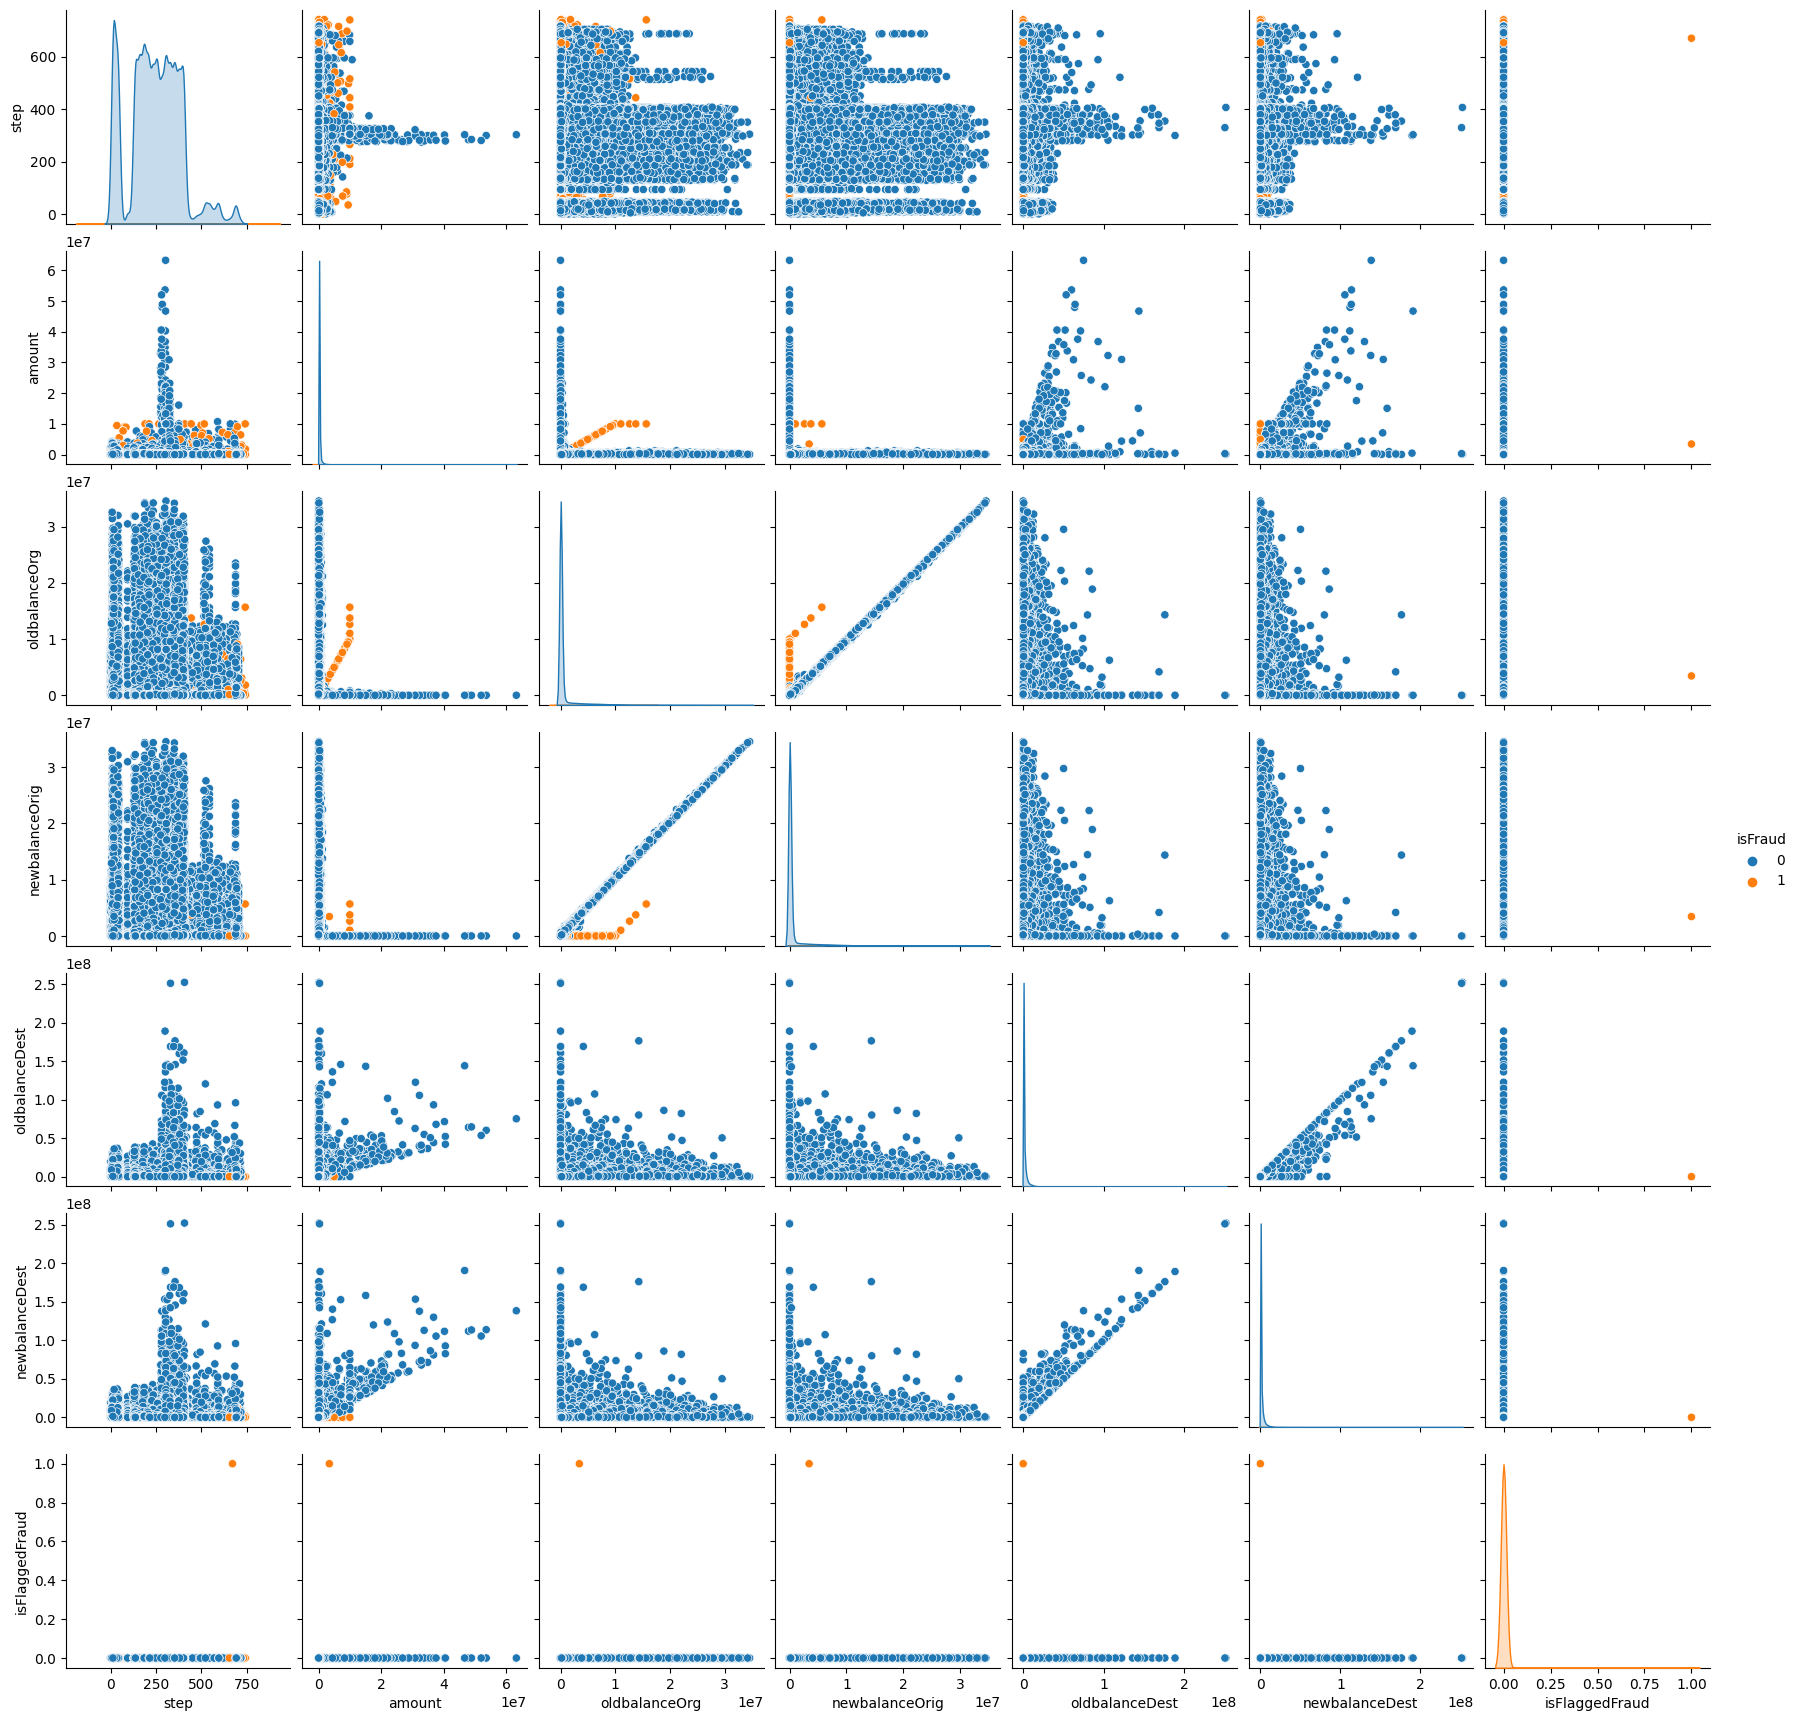

In [63]:
sns.pairplot(fraud, hue='isFraud')

### Verificando algumas correlações

In [11]:
fraud.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022608,-0.008795,-0.008866,0.027737,0.026123,0.029981,0.005327
amount,0.022608,1.000000,-0.005106,-0.009209,0.284468,0.466155,0.065258,0.009297
oldbalanceOrg,-0.008795,-0.005106,1.000000,0.998890,0.072687,0.046795,0.006337,0.001621
newbalanceOrig,-0.008866,-0.009209,0.998890,1.000000,0.074240,0.046580,-0.010136,0.001588
oldbalanceDest,0.027737,0.284468,0.072687,0.074240,1.000000,0.971254,-0.007383,-0.000593
newbalanceDest,0.026123,0.466155,0.046795,0.046580,0.971254,1.000000,-0.000993,-0.000607
isFraud,0.029981,0.065258,0.006337,-0.010136,-0.007383,-0.000993,1.000000,0.048880
isFlaggedFraud,0.005327,0.009297,0.001621,0.001588,-0.000593,-0.000607,0.048880,1.000000


### Visualizando essas correlações

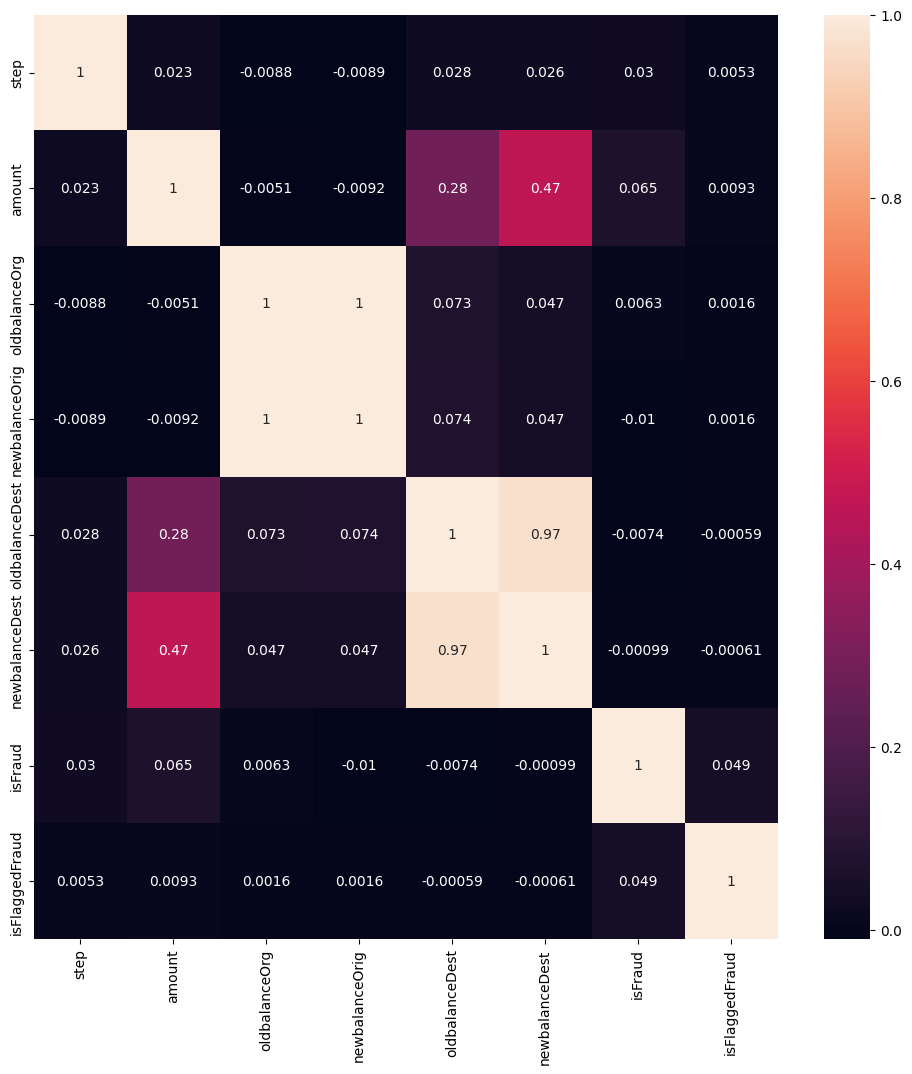

In [12]:
plt.figure(figsize = (12,12))
ax=sns.heatmap((fraud.corr()),annot=True)

### Vamos verificar algumas estatísticas dos dados numéricos da amostra

In [13]:

fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,318131.000000,3.181310e+05,3.181310e+05,3.181310e+05,3.181310e+05,3.181310e+05,318131.000000,318131.000000
mean,243.558748,1.798752e+05,8.274862e+05,8.488839e+05,1.098653e+06,1.224258e+06,0.001314,0.000003
std,142.265529,6.219314e+05,2.858383e+06,2.894898e+06,3.287211e+06,3.574592e+06,0.036224,0.001773
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.327174e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,240.000000,7.453970e+04,1.420700e+04,0.000000e+00,1.297052e+05,2.122888e+05,0.000000,0.000000
75%,335.000000,2.081513e+05,1.070693e+05,1.443581e+05,9.375246e+05,1.108527e+06,0.000000,0.000000
max,742.000000,6.329484e+07,3.457403e+07,3.449940e+07,2.522104e+08,2.523586e+08,1.000000,1.000000


### Pode-se perceber que temos valores desbalanceados

In [15]:
#verificando os tipos de transação disponíveis e sua frequência

fraud['type'].value_counts()

CASH_OUT    111659
PAYMENT     107871
CASH_IN      70050
TRANSFER     26447
DEBIT         2104
Name: type, dtype: int64

<AxesSubplot:title={'center':'Distribuição amostral dos tipos de transação'}, xlabel='type', ylabel='Count'>

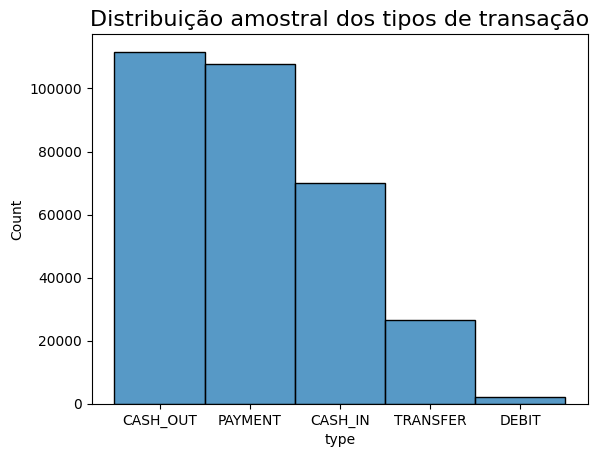

In [19]:
plt.title('Distribuição amostral dos tipos de transação', fontsize=16)
sns.histplot(fraud['type'])

In [21]:
fraud[fraud['isFraud']==1].groupby('type')['isFraud'].count()

type
CASH_OUT    230
TRANSFER    188
Name: isFraud, dtype: int64

In [22]:
fraud['nameOrig_code'] = fraud['nameOrig'].str[:1]
fraud['nameDest_code'] = fraud['nameDest'].str[:1]

In [23]:
fraud[['nameDest_code','nameOrig_code']].value_counts()

nameDest_code  nameOrig_code
C              C                210260
M              C                107871
dtype: int64

### Podemos verificar que temos fraude somente nos tipos de transação CASH_OUT e TRANSFER. Dessa forma podemos filtrar somente esses dados.

In [24]:

fraud_filtered = fraud[fraud['type'].isin(['CASH_OUT','TRANSFER'])]
fraud_filtered = fraud_filtered[fraud_filtered['nameDest_code'].isin({'C'})]
fraud_filtered[fraud_filtered['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_code,nameDest_code
6353617,706,TRANSFER,934590.45,C163014239,934590.45,0.0,C1656492728,0.00,0.00,1,0,C,C
6351245,704,TRANSFER,1820864.64,C2135939957,1820864.64,0.0,C2116903748,0.00,0.00,1,0,C,C
1852938,164,TRANSFER,276042.59,C1933312509,276042.59,0.0,C864512280,0.00,0.00,1,0,C,C
5724295,398,CASH_OUT,55247.48,C355084897,55247.48,0.0,C1980653895,11215285.22,11270532.70,1,0,C,C
3610372,266,CASH_OUT,10000000.00,C1096385925,10000000.00,0.0,C1423246212,499610.16,10499610.16,1,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292987,667,TRANSFER,71554.74,C118393699,71554.74,0.0,C1077131612,0.00,0.00,1,0,C,C
5551043,383,TRANSFER,4961093.21,C170364634,4961093.21,0.0,C128372734,0.00,0.00,1,0,C,C
1026292,48,TRANSFER,147267.01,C1261933788,147267.01,0.0,C1058127621,0.00,0.00,1,0,C,C
5937493,404,CASH_OUT,540914.12,C974262278,540914.12,0.0,C1711489125,36447.52,577361.64,1,0,C,C


### Vamos verificar se os valores foram filtrados mesmo, e quantos valores temos por tipo de transação fraudulenta

In [25]:

fraud_filtered['type'].value_counts()

CASH_OUT    111659
TRANSFER     26447
Name: type, dtype: int64

In [28]:
fraud_filtered["day"]=np.ceil(fraud_filtered["step"]/24)

In [29]:
fraud_filtered["hour"]=(fraud_filtered["step"]%24)

In [30]:
fraud_filtered.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_code,nameDest_code,day,hour
6280811,644,CASH_OUT,89046.73,C1737262733,37792.00,0.0,C2010914388,440602.75,529649.48,0,0,C,C,27.0,20
1678427,159,CASH_OUT,70185.99,C794165560,0.00,0.0,C706489693,140013.11,210199.10,0,0,C,C,7.0,15
3069719,235,CASH_OUT,133476.42,C60792859,0.00,0.0,C1888079483,1813731.67,1947208.09,0,0,C,C,10.0,19
306802,16,CASH_OUT,236070.56,C2059066550,70723.08,0.0,C123366619,794638.27,1030708.83,0,0,C,C,1.0,16
3509978,259,CASH_OUT,54463.23,C1025086365,0.00,0.0,C985042525,5089726.87,5144190.10,0,0,C,C,11.0,19


<AxesSubplot:xlabel='day', ylabel='amount'>

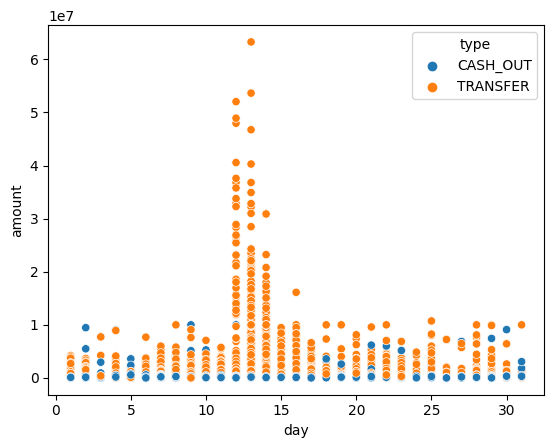

In [31]:
sns.scatterplot(data= fraud_filtered , x = 'day', y='amount',hue = 'type')

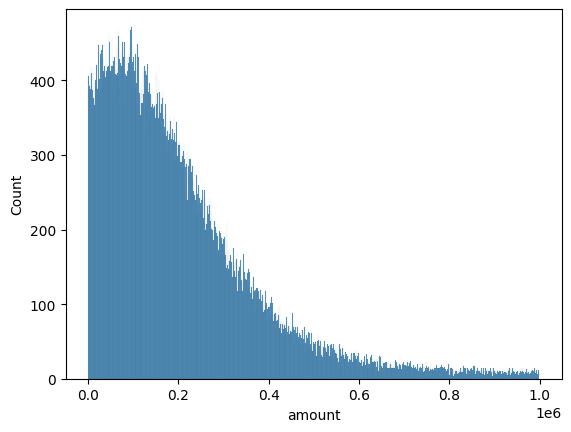

In [32]:
bin_values = np.arange(start=0, stop=1000000, step=1000)
g = sns.histplot(fraud_filtered['amount'],bins=bin_values)

<AxesSubplot:xlabel='newbalanceDest', ylabel='Count'>

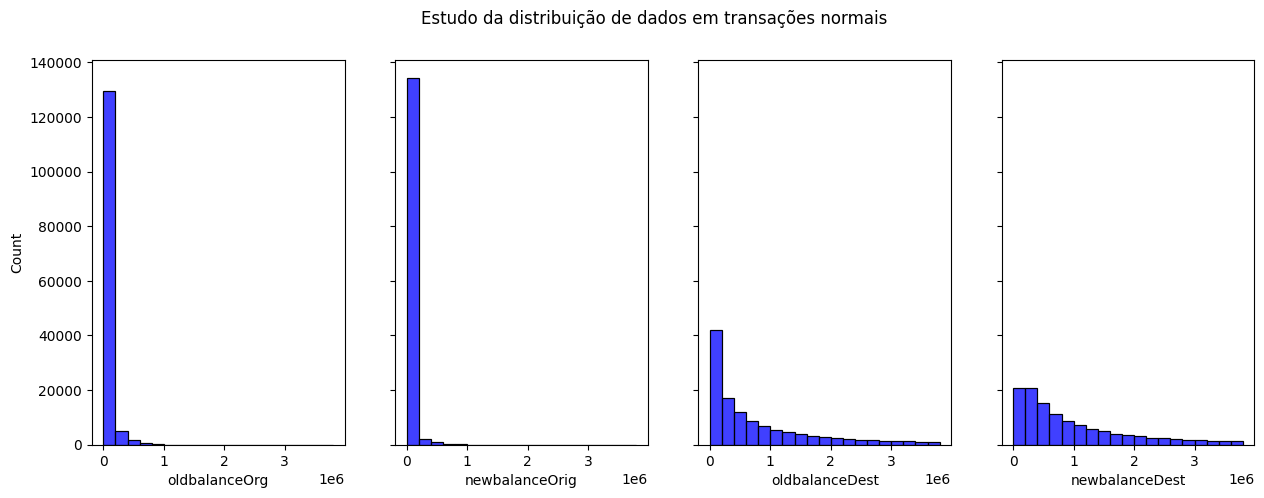

In [36]:
bin_values = np.arange(start=0, stop=4000000, step=200000)
fig, axes = plt.subplots(1, 4,figsize=(15,5),sharey=True)
fig.suptitle('Estudo da distribuição de dados em transações normais')
sns.histplot(ax = axes[0],x='oldbalanceOrg',bins=bin_values,data=fraud_filtered[fraud_filtered['isFraud']==0],color = 'blue')
sns.histplot(ax = axes[1],x='newbalanceOrig',bins=bin_values,data=fraud_filtered[fraud_filtered['isFraud']==0],color = 'blue')
sns.histplot(ax = axes[2],x='oldbalanceDest',bins=bin_values,data=fraud_filtered[fraud_filtered['isFraud']==0],color = 'blue')
sns.histplot(ax = axes[3],x='newbalanceDest',bins=bin_values,data=fraud_filtered[fraud_filtered['isFraud']==0],color = 'blue')

<AxesSubplot:xlabel='newbalanceDest', ylabel='Count'>

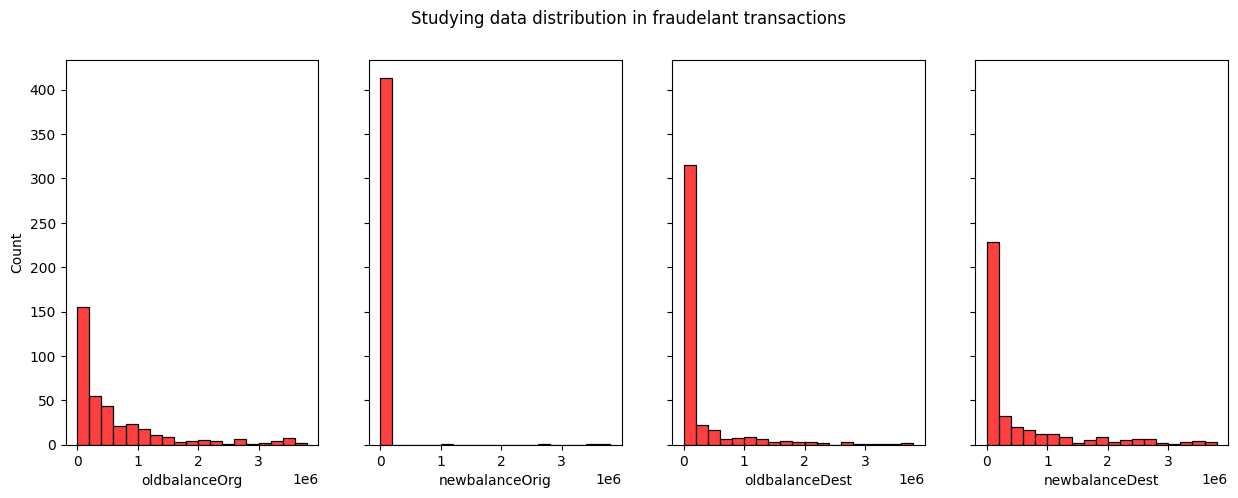

In [37]:
in_values = np.arange(start=0, stop=4000000, step=200000)
fig, axes = plt.subplots(1, 4,figsize=(15,5),sharey=True)
fig.suptitle('Studying data distribution in fraudelant transactions')
sns.histplot(ax = axes[0],x='oldbalanceOrg',bins=bin_values,data=fraud_filtered[fraud_filtered['isFraud']==1],color = 'red')
sns.histplot(ax = axes[1],x='newbalanceOrig',bins=bin_values,data=fraud_filtered[fraud_filtered['isFraud']==1],color = 'red')
sns.histplot(ax = axes[2],x='oldbalanceDest',bins=bin_values,data=fraud_filtered[fraud_filtered['isFraud']==1],color = 'red')
sns.histplot(ax = axes[3],x='newbalanceDest',bins=bin_values,data=fraud_filtered[fraud_filtered['isFraud']==1],color = 'red')

### Vamos verificar a contagem de transações não-fraudulentas e fraudulentas

<AxesSubplot:xlabel='isFraud', ylabel='count'>

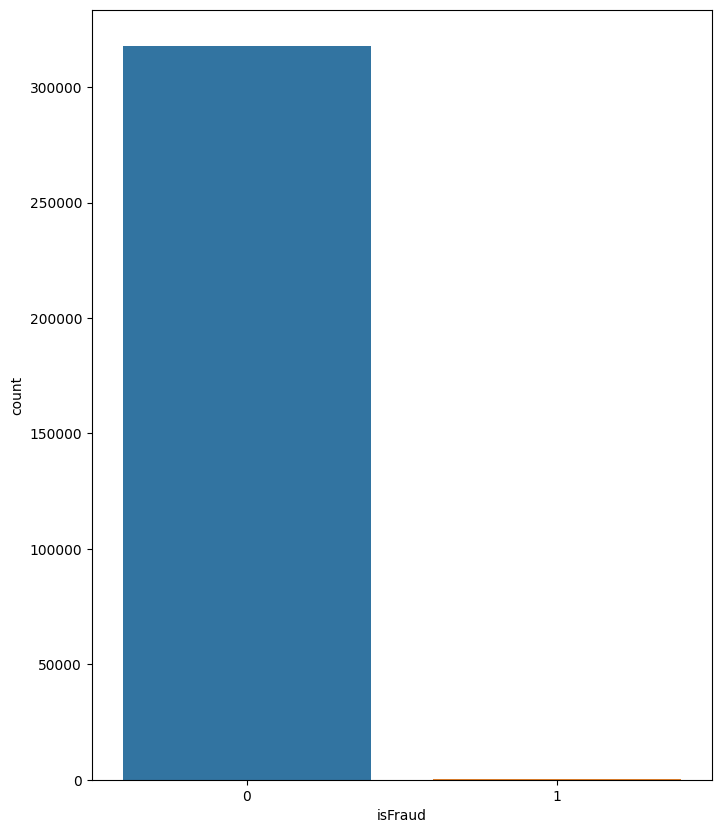

In [38]:

plt.figure(figsize = (8,10))
sns.countplot(x= fraud['isFraud'])

In [39]:
num_cols = ['step','oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest','amount']
for col in num_cols:
    Q1,Q3 = np.percentile(fraud_filtered[col], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = fraud_filtered[col][(fraud_filtered[col] > ul) | (fraud_filtered[col] < ll)]
    print(f'{col}:{len(outliers)}')

step:2156
oldbalanceOrg:19686
newbalanceOrig:13636
oldbalanceDest:14271
newbalanceDest:13916
amount:11069


### Da análise anterior concluímos a necessidade de:
#### .  under-sample em  nossos dados, devido ao desequilíbrio
#### . Imbalance scale nos dados devido aos valores outliers

In [43]:
def underSampling(fraud_filtered,target):
    down = min(fraud_filtered[target].value_counts())
    majority_index = fraud_filtered[fraud_filtered[target] == 0].index
    minority_index = fraud_filtered[fraud_filtered[target] == 1].index
    random_major_index= np.random.choice(majority_index,down,replace=False)
    under_sample_index = np.concatenate([minority_index,random_major_index])
    under_sample = fraud_filtered.loc[under_sample_index]
    return under_sample

In [45]:
fraud_filtered = underSampling(fraud_filtered,'isFraud')

# FEATURE ENG

In [46]:
encoder = {}
for i in fraud_filtered.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    fraud_filtered[i] = encoder[i].fit_transform(fraud_filtered[i])

In [47]:
X = fraud_filtered.drop(columns=['isFraud'])
y = fraud_filtered['isFraud']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42, stratify=y)

# SMOTE

In [ ]:
#over_sample = SMOTE(random_state=0)


In [ ]:
#X_train,y_train = over_sample.fit_resample(X,y)

In [ ]:
#y_train.value_counts()

## SCALER

In [49]:
scaler = MinMaxScaler()

In [50]:
x = scaler.fit_transform(X)

# KNN

In [51]:
def printScores(y_test, y_pred):
    print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))
    print('accuracy_score',accuracy_score(y_test, y_pred))
    print('Recall_score',recall_score(y_test, y_pred))
    print('precision_score',precision_score(y_test, y_pred))
    print('f1_score',f1_score(y_test,y_pred))    

In [52]:
param_grid ={'n_neighbors': range(1,5),
            'weights':['uniform','distance'],
              'algorithm':['auto'],
              'leaf_size':[1,3],
              'metric':['minkowski'],
              'p': [1,2]
              }  

In [53]:
knn_clf = KNeighborsClassifier()

In [54]:
grid = GridSearchCV(knn_clf, param_grid= param_grid, cv = 2, scoring = ['precision', 'recall'],refit='recall')
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [1, 3],
                         'metric': ['minkowski'], 'n_neighbors': range(1, 5),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             refit='recall', scoring=['precision', 'recall'])

In [55]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [70]:
knn_pred = grid.predict(X_test)
Knn_pred_train = grid.predict(X_train)

In [74]:
printScores(y_test,knn_pred)

Confusion matrix:
 [[121   5]
 [  3 122]]
accuracy_score 0.9681274900398407
Recall_score 0.976
precision_score 0.9606299212598425
f1_score 0.9682539682539683


In [75]:
printScores(y_train,Knn_pred_train)

Confusion matrix:
 [[286   6]
 [  4 289]]
accuracy_score 0.9829059829059829
Recall_score 0.9863481228668942
precision_score 0.9796610169491525
f1_score 0.9829931972789115


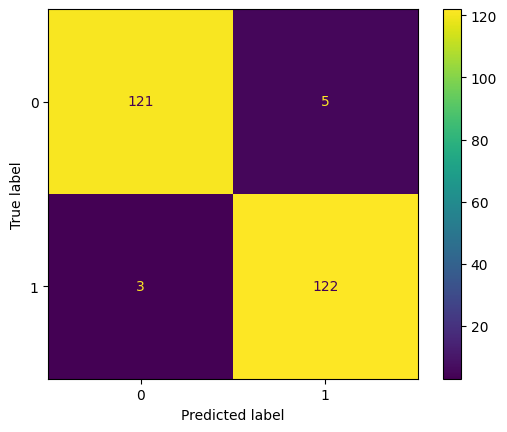

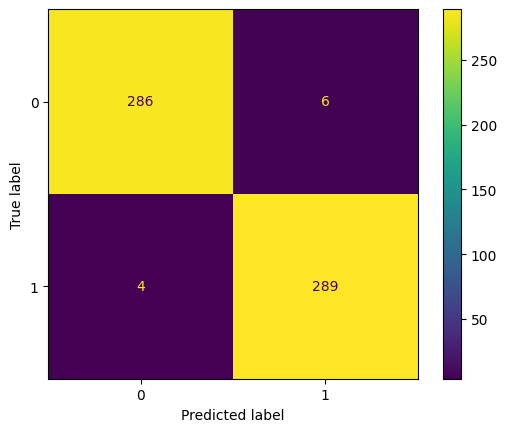

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)
ConfusionMatrixDisplay.from_predictions(y_train, Knn_pred_train)

# Decision tree

In [58]:
params_decision = {
'max_depth':[5,10],
'min_samples_split':[2,3],
'min_samples_leaf':range(5,10),
 'min_impurity_decrease': [0.0001, 0.001, 0.005]
}

In [59]:
c = DecisionTreeClassifier()
clf = GridSearchCV(c,param_grid= params_decision,scoring ='recall')

In [60]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10],
                         'min_impurity_decrease': [0.0001, 0.001, 0.005],
                         'min_samples_leaf': range(5, 10),
                         'min_samples_split': [2, 3]},
             scoring='recall')

In [61]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001,
                       min_samples_leaf=7, min_samples_split=3)

In [76]:
tree_pred = clf.predict(X_test)
tree_pred_train = clf.predict(X_train)

In [77]:
printScores(y_test, tree_pred)

Confusion matrix:
 [[124   2]
 [  2 123]]
accuracy_score 0.9840637450199203
Recall_score 0.984
precision_score 0.984
f1_score 0.984


In [78]:
printScores(y_train,tree_pred_train)

Confusion matrix:
 [[273  19]
 [ 10 283]]
accuracy_score 0.9504273504273504
Recall_score 0.9658703071672355
precision_score 0.9370860927152318
f1_score 0.9512605042016807


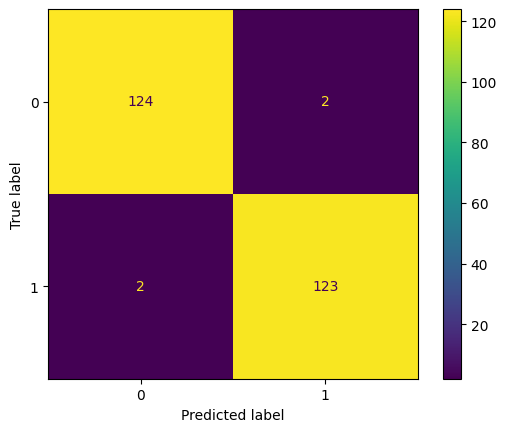

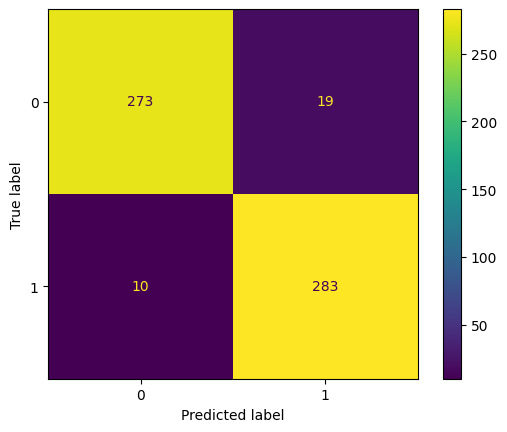

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, tree_pred)
ConfusionMatrixDisplay.from_predictions(y_train, tree_pred_train)